In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
files = get_image_files(path/"images")
pat = r'^(.*)_\d+.jpg'
# dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

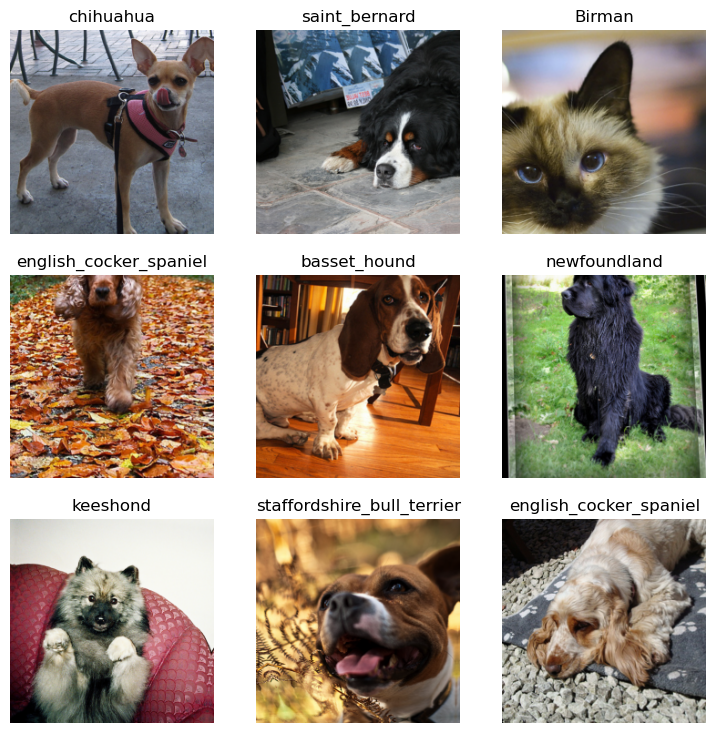

In [4]:
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0005754399462603033)

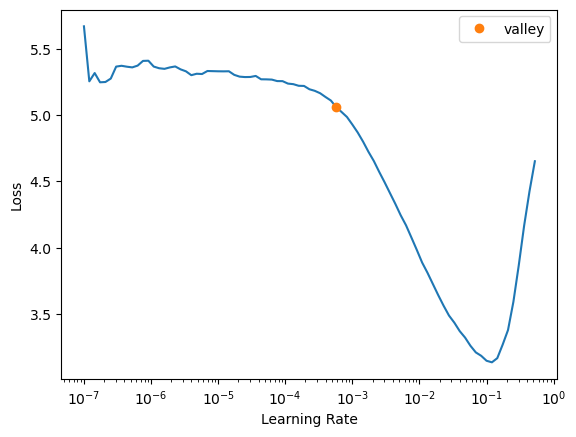

In [6]:
learn.lr_find()

In [7]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.367293,0.419712,0.139378,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.535320,0.390689,0.121110,01:13
1,0.362734,0.312300,0.098106,01:34


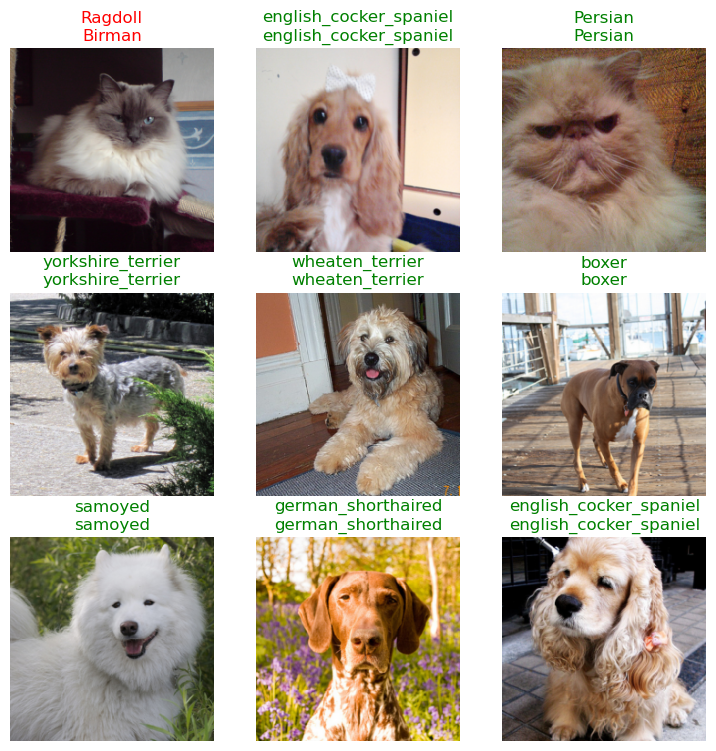

In [10]:
learn.show_results()

In [11]:
interp = Interpretation.from_learner(learn)

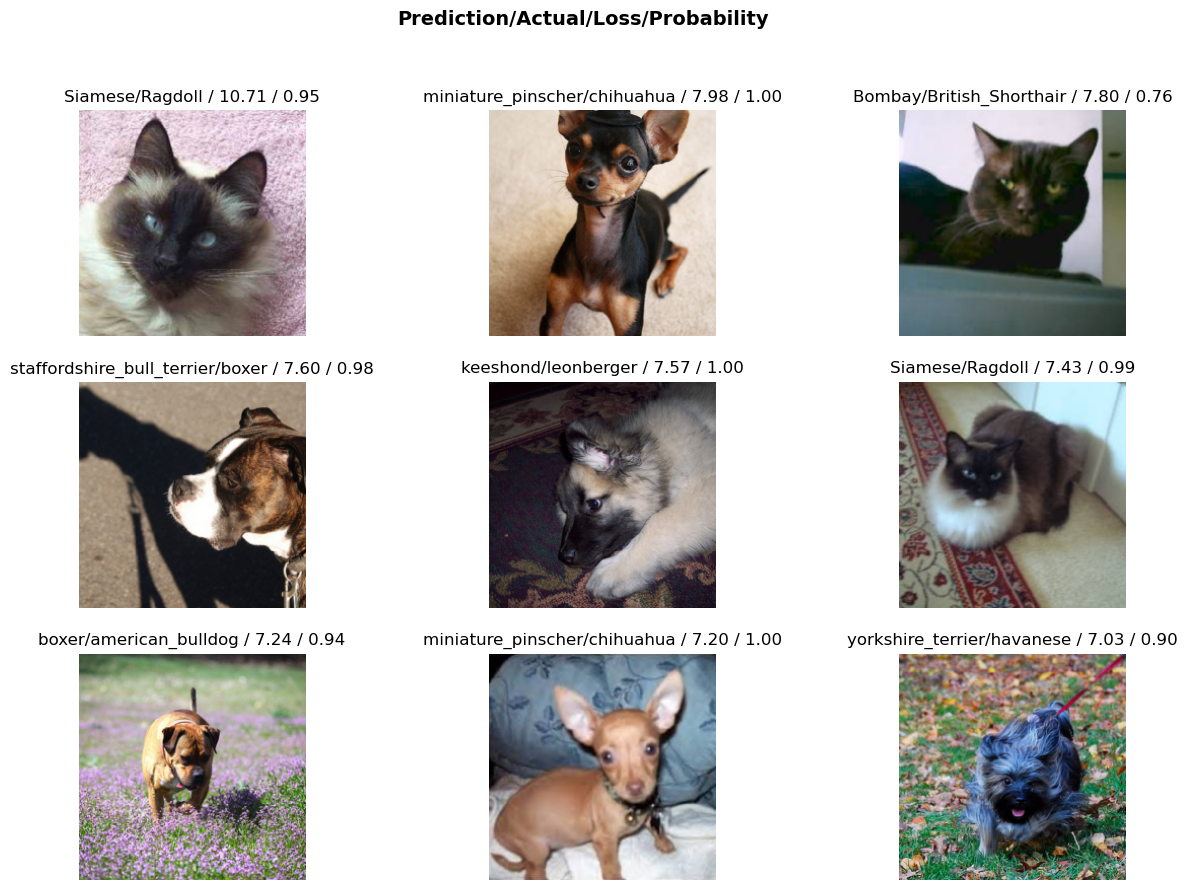

In [12]:
interp.plot_top_losses(9, figsize=(15,10))